<h3>HEART DISEASE ANALYSIS</h3>

<h3>CONTENT</h3>

<ul>
    <a href='#1'><li>INTRODUCTION</li></a>
    <a href='#2'><li>DATASET COLUMNS FEATURE EXPLAIN</li></a>
    <a href='#3'><li>INVESTIGATING THE DATA and EXPLORATORY DATA ANALSIS</li></a>
        <ul>
            <a href='#4'><li>One Visualization to Rule Them All</li></a>
            <a href='#5'><li>Age Analysis</li></a>
            <a href='#6'><li>Sex (Gender) Analysis</li></a>
            <a href='#7'><li>Chest Pain Type Analysis</li></a>
            <a href='#8'><li>Age Range Analysis</li></a>
            <a href='#9'><li>Thalach Analysis</li></a>
            <a href='#10'><li>Thal Analysis</li></a>
            <a href='#11'><li>Target Analysis</li></a>
        </ul>
    <li>MODEL, TRAINING and TESTING</li>
        <ul>
            <li>Logistic Regression</li>
            <li>Naive Bayes</li>
            <li>Decision Tree</li>
            <li>Random Forest</li>
            <li>Gradient Boosting Machine</li>
            <li>Kernelized SVM</li>
        </ul>
    <li>CONCLUSION</li>
    <li>REFERENCES</li> 
</ul>


<p id='1'><h3>INTRODUCTION</h3></p>
<p>This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).</p>
<p>In addition, we will analyze for this dataset. We will use a wide range of tools for this part. If there's value in there, we'il do it there. Finally, machine learning algorithms are estimated.</p>

<p>If you want to get detailed information about python programming you can look at my account.</p>

<ul>
    Python Programming for Beginner :<li>https://www.kaggle.com/kralmachine/python-programming-language-for-data-scientists</li>
</ul>

<p>Other kernels: https://www.kaggle.com/kralmachine/kernels</p>



<p id='2'><h3>DATASET COLUMNS FEATURE EXPLAIN</h3></p>
<ul>
    <li>Age (age in years)</li>
    <li>Sex (1 = male; 0 = female)</li>
    <li>CP (chest pain type)</li>
    <li>TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))</li>
    <li>CHOL (serum cholestoral in mg/dl)</li>
    <li>FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
    <li>RESTECH (resting electrocardiographic results)</li>
    <li>THALACH (maximum heart rate achieved)</li>
    <li>EXANG (exercise induced angina (1 = yes; 0 = no))</li>
    <li>OLDPEAK (ST depression induced by exercise relative to rest)</li>
    <li>SLOPE (the slope of the peak exercise ST segment)</li>
    <li>CA (number of major vessels (0-3) colored by flourosopy)</li>
    <li>THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)</li>
    <li>TARGET (1 or 0)</li>
</ul>

<p id='3'><h3>INVESTIGATING THE DATA and EXPLORATORY DATA ANALSIS</h3></p>

<p>First, I install all the libraries that I will use in our application. I install all the libraries in the first part because the algorithms I will use later and the analysis I will make more clearly will be done.Furthurmore, I have investigated the data, presented some visualization and analysed features. Let's write it. I will import necessary Python modules and read the data.</p>

In [11]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

<p>Now, we are uploading our data set to the data variable using the <b>read_csv</b> function in the pandas library. </p>

In [12]:
data=pd.read_csv('heart.csv')

In [13]:
#Now, our data is loaded. We're writing the following snippet to see the loaded data. The purpose here is to see the top five of the loaded data.

print('Data First 5 Rows Show\n')
data.head()


Data First 5 Rows Show



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
print('Data Last 5 Rows Show\n')
data.tail()

Data Last 5 Rows Show



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


<p>Both the <b>head() and tail()</b> functions have a value of 5 by default. different values should be given as parameters to change these values.</p>

In [15]:
print('Data Show Describe\n')
data.describe()

Data Show Describe



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<p>Describe function is a function that allows analysis between the numerical values contained in the data set. Using this function count, mean, std, min, max, 25%, 50%, 75%.</p>
<p>As seen in this section, most values are generally categorized. This means that we need to integrate other values into this situation. These; age, trestbps, chol, thalach.</p>

In [16]:
print('Data Show Info\n')
data.info()

Data Show Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [17]:
#We will list all the columns for all data. We check all columns. Is there any spelling mistake?
print('Data Show Columns:\n')
data.columns

Data Show Columns:



Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

<p>As you can see, we are making a single clue of the columns that the data set contains. This is the evaluation for this. Because it will be more effective in future analysis.</p>

In [18]:
data=data.rename(columns={'age':'Age','sex':'Sex','cp':'Cp','trestbps':'Trestbps','chol':'Chol','fbs':'Fbs','restecg':'Restecg','thalach':'Thalach','exang':'Exang','oldpeak':'Oldpeak','slope':'Slope','ca':'Ca','thal':'Thal','target':'Target'})

In [19]:
#New show columns
data.columns

Index(['Age', 'Sex', 'Cp', 'Trestbps', 'Chol', 'Fbs', 'Restecg', 'Thalach',
       'Exang', 'Oldpeak', 'Slope', 'Ca', 'Thal', 'Target'],
      dtype='object')

In [20]:
#And, how many rows and columns are there for all data?
print('Data Shape Show\n')
data.shape  #first one is rows, other is columns

Data Shape Show



(303, 14)

In [21]:
#Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data.
print('Data Sum of Null Values \n')
data.isnull().sum()

Data Sum of Null Values 



Age         0
Sex         0
Cp          0
Trestbps    0
Chol        0
Fbs         0
Restecg     0
Thalach     0
Exang       0
Oldpeak     0
Slope       0
Ca          0
Thal        0
Target      0
dtype: int64

<p id='4'><h3>One Visualization to Rule Them All</h3></p>

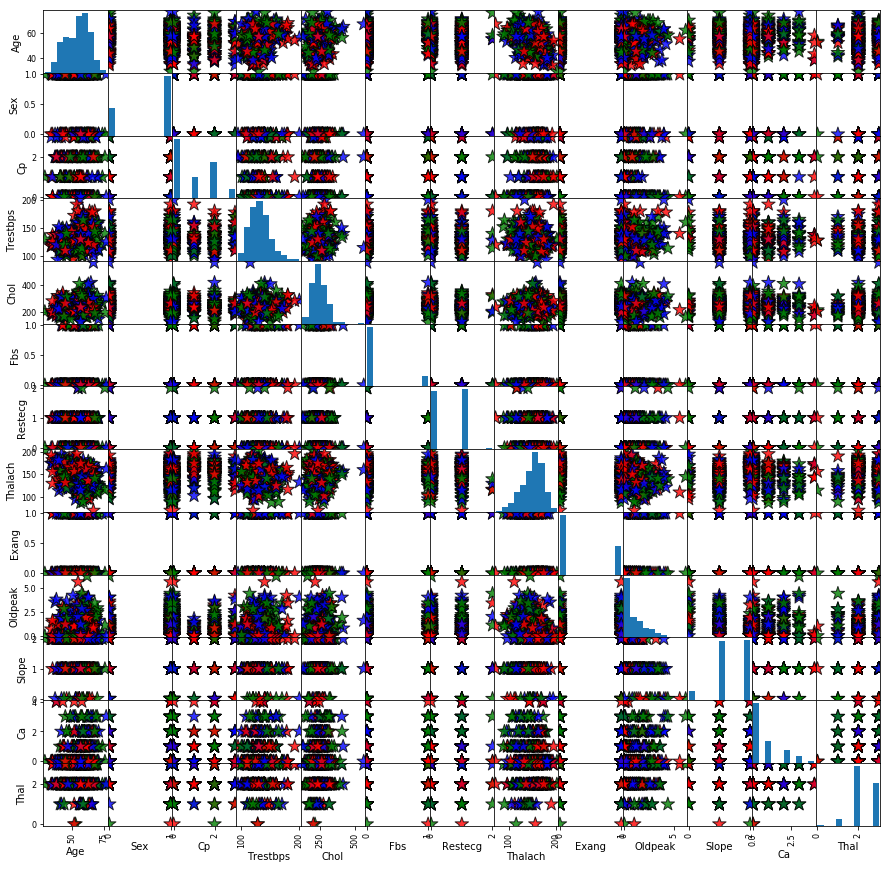

In [22]:
#We will perform analysis on the training data. The relationship between the features found in the training data is observed. In this way, comments about the properties can be made

pd.plotting.scatter_matrix(data.loc[:,data.columns!='Target'],
                          c=['green','blue','red'],
                          figsize=[15,15],
                          diagonal='hist',
                          alpha=0.8,
                          s=200,
                          marker='*',
                          edgecolor='black')
plt.show()

<p>We will perform analysis on the training data. The relationship between the features found in the training data is observed. In this way, comments about the properties can be made
</p>

<p id='5'><h3>Age Analysis</h3></p>

In [23]:
data.Age.value_counts()[:10]
#data age show value counts for age least 10

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: Age, dtype: int64

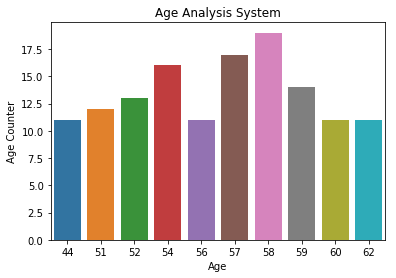

In [24]:
sns.barplot(x=data.Age.value_counts()[:10].index,y=data.Age.value_counts()[:10].values)
plt.xlabel('Age')
plt.ylabel('Age Counter')
plt.title('Age Analysis System')
plt.show()

<p>In this section, the best analysis can be divided into the <b>elderly,middle-aged, young</b> people by looking at the age ranges.</p>

In [25]:
#firstly find min and max ages
minAge=min(data.Age)
maxAge=max(data.Age)
meanAge=data.Age.mean()
print('Min Age :',minAge)
print('Max Age :',maxAge)
print('Mean Age :',meanAge)

Min Age : 29
Max Age : 77
Mean Age : 54.366336633663366


In [26]:
young_ages=data[(data.Age>=29)&(data.Age<40)]
middle_ages=data[(data.Age>=40)&(data.Age<55)]
elderly_ages=data[(data.Age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))

Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


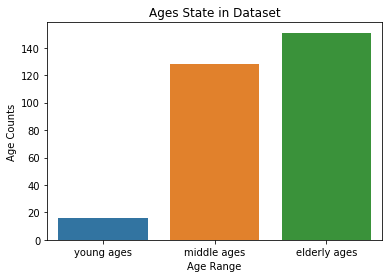

In [27]:
sns.barplot(x=['young ages','middle ages','elderly ages'],y=[len(young_ages),len(middle_ages),len(elderly_ages)])
plt.xlabel('Age Range')
plt.ylabel('Age Counts')
plt.title('Ages State in Dataset')
plt.show()

<p>so,a new <b>feature</b> value can be removed from these age ranges will not affect this impact will see in the future.</p>

In [28]:
data['AgeRange']=0
youngAge_index=data[(data.Age>=29)&(data.Age<40)].index
middleAge_index=data[(data.Age>=40)&(data.Age<55)].index
elderlyAge_index=data[(data.Age>55)].index

In [29]:
for index in elderlyAge_index:
    data.loc[index,'AgeRange']=2
    
for index in middleAge_index:
    data.loc[index,'AgeRange']=1

for index in youngAge_index:
    data.loc[index,'AgeRange']=0

<p id='6'><h3>Sex (Gender) Analysis</h3></p>

In [30]:
data.Sex.value_counts()

1    207
0     96
Name: Sex, dtype: int64

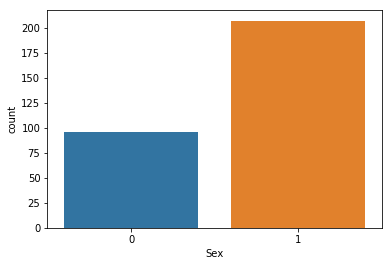

In [31]:
#Sex (1 = male; 0 = female)
sns.countplot(data.Sex)
plt.show()

<p>In the above output, I wish it would be good if there was an equal proportion of people. At the moment it seems to be imbalance value, but for this situation it applies to Gender.</p>

In [32]:
total_genders_count=len(data.Sex)
male_count=len(data[data['Sex']==1])
female_count=len(data[data['Sex']==0])
print('Total Genders :',total_genders_count)
print('Male Count    :',male_count)
print('Female Count  :',female_count)

Total Genders : 303
Male Count    : 207
Female Count  : 96


In [33]:
#Percentage ratios
print("Male State: {:.2f}%".format((male_count / (total_genders_count)*100)))
print("Female State: {:.2f}%".format((female_count / (total_genders_count)*100)))

Male State: 68.32%
Female State: 31.68%


<p>Now, we are going to analyze both the sex and the heart health situation.</p>

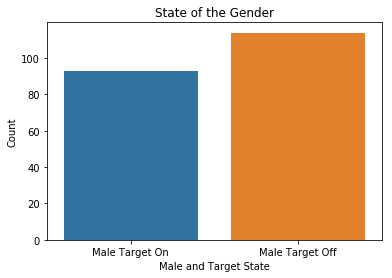

In [34]:
#Male State & target 1 & 0
male_andtarget_on=len(data[(data.Sex==1)&(data['Target']==1)])
male_andtarget_off=len(data[(data.Sex==1)&(data['Target']==0)])
####
sns.barplot(x=['Male Target On','Male Target Off'],y=[male_andtarget_on,male_andtarget_off])
plt.xlabel('Male and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

<p>In this section, the rate of disease is seen less when the gender value is male. This is the result of an analysis for us.</p>

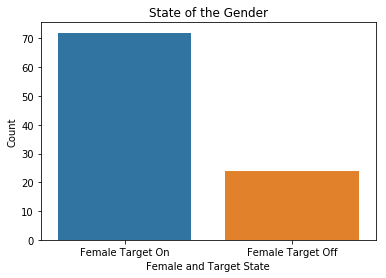

In [35]:
#Female State & target 1 & 0
female_andtarget_on=len(data[(data.Sex==0)&(data['Target']==1)])
female_andtarget_off=len(data[(data.Sex==0)&(data['Target']==0)])
####
sns.barplot(x=['Female Target On','Female Target Off'],y=[female_andtarget_on,female_andtarget_off])
plt.xlabel('Female and Target State')
plt.ylabel('Count')
plt.title('State of the Gender')
plt.show()

<p>In the above analysis, the gender of people who are female is more common. In order to better understand this, we will make a more effective analysis in the following stages.</p>

In [36]:
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2


<p id='7'><h3>Chest Pain Type Analysis</h3></p>
<p>A wide range of chest pain is present in cases of heart failure. These pains will be analyzed according to their problems and age ranges in the analysis system.</p>

In [37]:
#As seen, there are 4 types of chest pain.
data.Cp.value_counts()

0    143
2     87
1     50
3     23
Name: Cp, dtype: int64

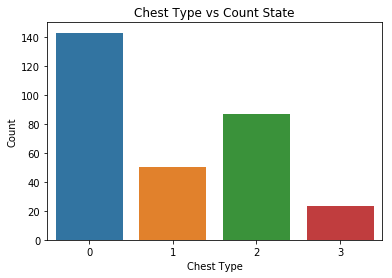

In [38]:
sns.countplot(data.Cp)
plt.xlabel('Chest Type')
plt.ylabel('Count')
plt.title('Chest Type vs Count State')
plt.show()
#0 status at least
#1 condition slightly distressed
#2 condition medium problem
#3 condition too bad

In [39]:
cp_zero_target_zero=len(data[(data.Cp==0)&(data.Target==0)])
cp_zero_target_one=len(data[(data.Cp==0)&(data.Target==1)])

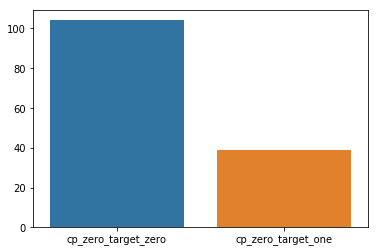

In [40]:
sns.barplot(x=['cp_zero_target_zero','cp_zero_target_one'],y=[cp_zero_target_zero,cp_zero_target_one])
plt.show()

In [41]:
cp_one_target_zero=len(data[(data.Cp==1)&(data.Target==0)])
cp_one_target_one=len(data[(data.Cp==1)&(data.Target==1)])

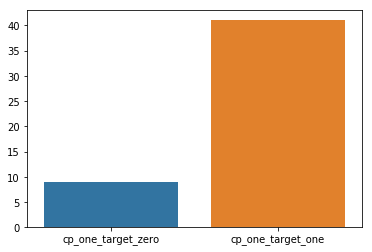

In [42]:
sns.barplot(x=['cp_one_target_zero','cp_one_target_one'],y=[cp_one_target_zero,cp_one_target_one])
plt.show()

In [43]:
cp_two_target_zero=len(data[(data.Cp==2)&(data.Target==0)])
cp_two_target_one=len(data[(data.Cp==2)&(data.Target==1)])

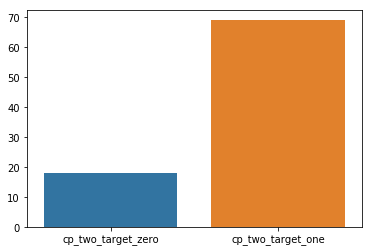

In [44]:
sns.barplot(x=['cp_two_target_zero','cp_two_target_one'],y=[cp_two_target_zero,cp_two_target_one])
plt.show()

In [45]:
cp_three_target_zero=len(data[(data.Cp==3)&(data.Target==0)])
cp_three_target_one=len(data[(data.Cp==3)&(data.Target==1)])

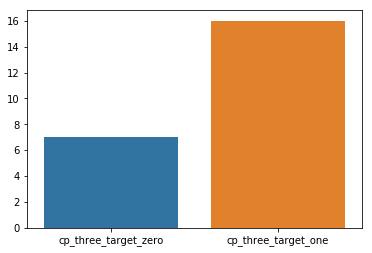

In [46]:
sns.barplot(x=['cp_three_target_zero','cp_three_target_one'],y=[cp_three_target_zero,cp_three_target_one])
plt.show()

<p>As a result of the above analyzes, it can be seen that 0 cases with chest pain are less common with heart disease. But on the other hand, there are problems in all cases of chest pain, such as 1,2,3.</p>

<p id='8'><h3>Age Range Analysis</h3></p>
<p>In this section, age range analysis values are revealed. In this section we have used our new feature values.</p>

In [47]:
target_0_agerang_0=len(data[(data.Target==0)&(data.AgeRange==0)])
target_1_agerang_0=len(data[(data.Target==1)&(data.AgeRange==0)])

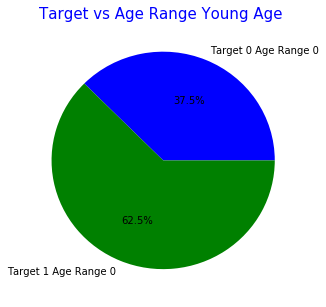

In [48]:
colors = ['blue','green']
explode = [0,0]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_0,target_1_agerang_0], explode=explode, labels=['Target 0 Age Range 0','Target 1 Age Range 0'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Young Age ',color = 'blue',fontsize = 15)
plt.show()

In [49]:
target_0_agerang_1=len(data[(data.Target==0)&(data.AgeRange==1)])
target_1_agerang_1=len(data[(data.Target==1)&(data.AgeRange==1)])

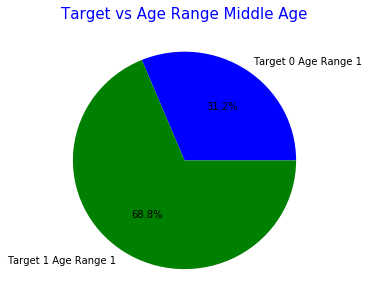

In [50]:
colors = ['blue','green']
explode = [0,0]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_1,target_1_agerang_1], explode=explode, labels=['Target 0 Age Range 1','Target 1 Age Range 1'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Middle Age',color = 'blue',fontsize = 15)
plt.show()

In [51]:
target_0_agerang_2=len(data[(data.Target==0)&(data.AgeRange==2)])
target_1_agerang_2=len(data[(data.Target==1)&(data.AgeRange==2)])

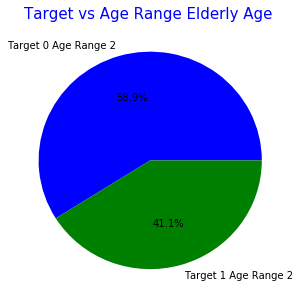

In [52]:
colors = ['blue','green']
explode = [0,0]
plt.figure(figsize = (5,5))
plt.pie([target_0_agerang_2,target_1_agerang_2], explode=explode, labels=['Target 0 Age Range 2','Target 1 Age Range 2'], colors=colors, autopct='%1.1f%%')
plt.title('Target vs Age Range Elderly Age ',color = 'blue',fontsize = 15)
plt.show()

<p id='9'><h3>Thalach Analysis</h3></p>
<p>The analysis of the system we discussed in the case of maximum heart rate is shown.</p>

In [53]:
data.Thalach.value_counts()[:20]
#First show 20 rows

162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
144     7
156     6
169     6
158     6
140     6
142     6
178     5
161     5
154     5
165     5
Name: Thalach, dtype: int64

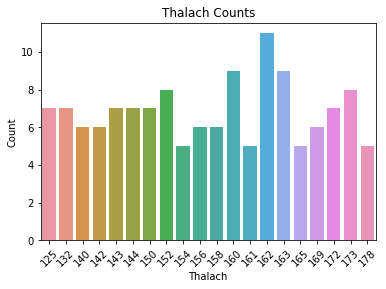

In [54]:
sns.barplot(x=data.Thalach.value_counts()[:20].index,y=data.Thalach.value_counts()[:20].values)
plt.xlabel('Thalach')
plt.ylabel('Count')
plt.title('Thalach Counts')
plt.xticks(rotation=45)
plt.show()

<p>In the analysis system, which will be carried out now, an analysis shall be carried out for all persons or their status in the target process.</p>

In [55]:
age_unique=sorted(data.Age.unique())
age_thalach_values=data.groupby('Age')['Thalach'].count().values
mean_thalach=[]
for i,age in enumerate(age_unique):
    mean_thalach.append(sum(data[data['Age']==age].Thalach)/age_thalach_values[i])

<p>The transactions we perform in this section mean an average age. In this part, taking the average of all transactions is performed.</p>

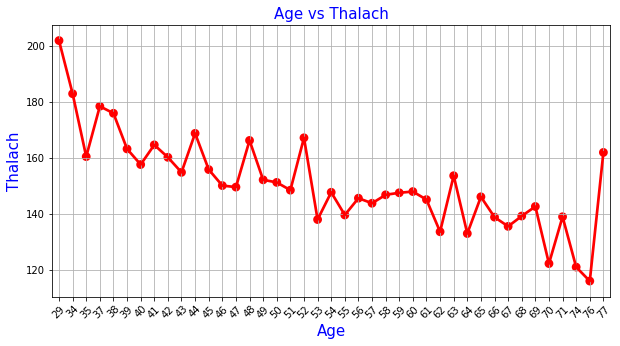

In [56]:
#data_sorted=data.sort_values(by='Age',ascending=True)
plt.figure(figsize=(10,5))
sns.pointplot(x=age_unique,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

<p>In this section we will use the groupby function. Our aim here is to obtain the average values of Thalach according to age ranges. Because we're going to do chest pain.</p>

In [66]:
age_range_thalach=data.groupby('AgeRange')['Thalach'].mean()

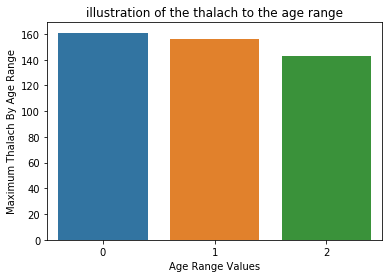

In [76]:
sns.barplot(x=age_range_thalach.index,y=age_range_thalach.values)
plt.xlabel('Age Range Values')
plt.ylabel('Maximum Thalach By Age Range')
plt.title('illustration of the thalach to the age range')
plt.show()
#As shown in this graph, this rate decreases as the heart rate 
#is faster and in old age areas.

In [ ]:
cp_thalach=data.groupby('Cp')['Thalach'].mean()

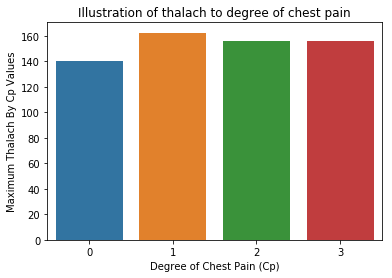

In [78]:
sns.barplot(x=cp_thalach.index,y=cp_thalach.values)
plt.xlabel('Degree of Chest Pain (Cp)')
plt.ylabel('Maximum Thalach By Cp Values')
plt.title('Illustration of thalach to degree of chest pain')
plt.show()
#As seen in this graph, it is seen that the heart rate is less 
#when the chest pain is low. But in cases where chest pain is 
#1, it is observed that the area is more. 2 and 3 were found to 
#be of the same degree.

<p id=10><h3>Thal Analysis</h3></p>
<p>3 = normal; 6 = fixed defect; 7 = reversable defect</p>

In [81]:
data.Thal.value_counts()

2    166
3    117
1     18
0      2
Name: Thal, dtype: int64

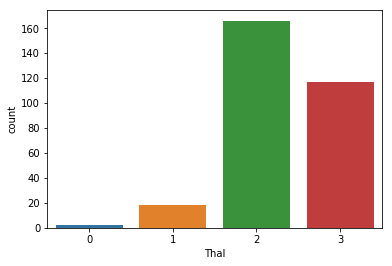

In [82]:
sns.countplot(data.Thal)
plt.show()

<p>According to the analysis, Thal values are observed. Of these values, 0 is only 2. 1 showed a distribution of 18. In order to better understand this distribution, we need to take a look at the data set.</p>

In [86]:
data[(data.Thal==0)]
#as seen, only 50% was understood to be 50% target.

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0,1


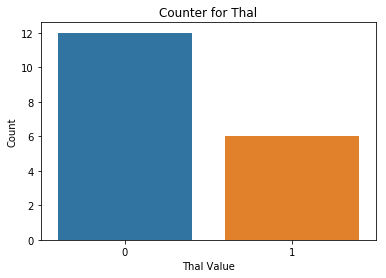

In [100]:
data[(data['Thal']==1)].Target.value_counts()
sns.barplot(x=data[(data['Thal']==1)].Target.value_counts().index,y=data[(data['Thal']==1)].Target.value_counts().values)
plt.xlabel('Thal Value')
plt.ylabel('Count')
plt.title('Counter for Thal')
plt.show()

<p>Another issue I am curious about in this section is the situation in which the value of the target is 1 and it is the maximum value of Thal.</p>

In [126]:
#Target 1
a=len(data[(data['Target']==1)&(data['Thal']==0)])
b=len(data[(data['Target']==1)&(data['Thal']==1)])
c=len(data[(data['Target']==1)&(data['Thal']==2)])
d=len(data[(data['Target']==1)&(data['Thal']==3)])
print('Target 1 Thal 0: ',a)
print('Target 1 Thal 1: ',b)
print('Target 1 Thal 2: ',c)
print('Target 1 Thal 3: ',d)

#so,Apparently, there is a rate at Thal 2.Now, draw graph
print('*'*50)
#Target 0
e=len(data[(data['Target']==0)&(data['Thal']==0)])
f=len(data[(data['Target']==0)&(data['Thal']==1)])
g=len(data[(data['Target']==0)&(data['Thal']==2)])
h=len(data[(data['Target']==0)&(data['Thal']==3)])
print('Target 0 Thal 0: ',e)
print('Target 0 Thal 1: ',f)
print('Target 0 Thal 2: ',g)
print('Target 0 Thal 3: ',h)

Target 1 Thal 0:  1
Target 1 Thal 1:  6
Target 1 Thal 2:  130
Target 1 Thal 3:  28
**************************************************
Target 0 Thal 0:  1
Target 0 Thal 1:  12
Target 0 Thal 2:  36
Target 0 Thal 3:  89


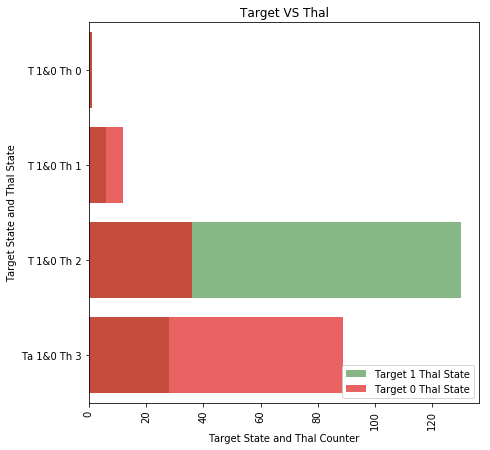

In [144]:
f,ax=plt.subplots(figsize=(7,7))
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1','T 1&0 Th 2','Ta 1&0 Th 3'],x=[1,6,130,28],color='green',alpha=0.5,label='Target 1 Thal State')
sns.barplot(y=['T 1&0 Th 0','T 1&0 Th 1','T 1&0 Th 2','Ta 1&0 Th 3'],x=[1,12,36,89],color='red',alpha=0.7,label='Target 0 Thal State')
ax.legend(loc='lower right',frameon=True)
ax.set(xlabel='Target State and Thal Counter',ylabel='Target State and Thal State',title='Target VS Thal')
plt.xticks(rotation=90)
plt.show()
#so, there has been a very nice graphic display. This is the situation that best describes the situation.

<p id=11><h3>Target Analysis</h3></p>
<p>We will analyze this feature for people who are sick or not.</p>

In [149]:
data.Target.unique()
#only two values are shown.
#A value of 1 is the value of patient 0.

array([1, 0], dtype=int64)

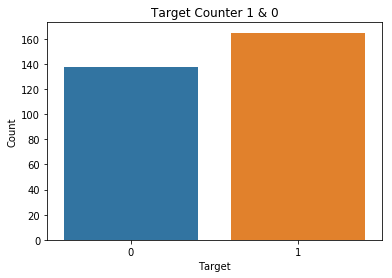

In [151]:
sns.countplot(data.Target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target Counter 1 & 0')
plt.show()

In [159]:
#determine the age ranges of patients with and without sickness and make analyzes about them
age_counter_target_1=[]
age_counter_target_0=[]
for age in data.Age.unique():
    age_counter_target_1.append(len(data[(data['Age']==age)&(data.Target==1)]))
    age_counter_target_0.append(len(data[(data['Age']==age)&(data.Target==0)]))

#now, draw show on graph    

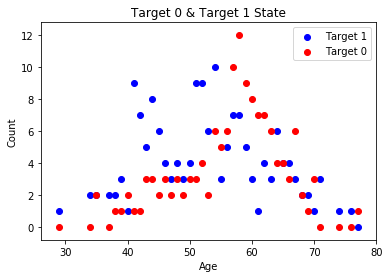

In [167]:
#Target 1 & 0 show graph on scatter
plt.scatter(x=data.Age.unique(),y=age_counter_target_1,color='blue',label='Target 1')
plt.scatter(x=data.Age.unique(),y=age_counter_target_0,color='red',label='Target 0')
plt.legend(loc='upper right',frameon=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Target 0 & Target 1 State')
plt.show()

In [168]:
data.head()

,Age,Sex,Cp,Trestbps,Chol,Fbs,Restecg,Thalach,Exang,Oldpeak,Slope,Ca,Thal,Target,AgeRange
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,2
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,2


In [181]:
male_young_t_1=data[(data['Sex']==1)&(data['AgeRange']==0)&(data['Target']==1)]
male_middle_t_1=data[(data['Sex']==1)&(data['AgeRange']==1)&(data['Target']==1)]
male_elderly_t_1=data[(data['Sex']==1)&(data['AgeRange']==2)&(data['Target']==1)]
print(len(male_young_t_1))
print(len(male_middle_t_1))
print(len(male_elderly_t_1))

8
55
30


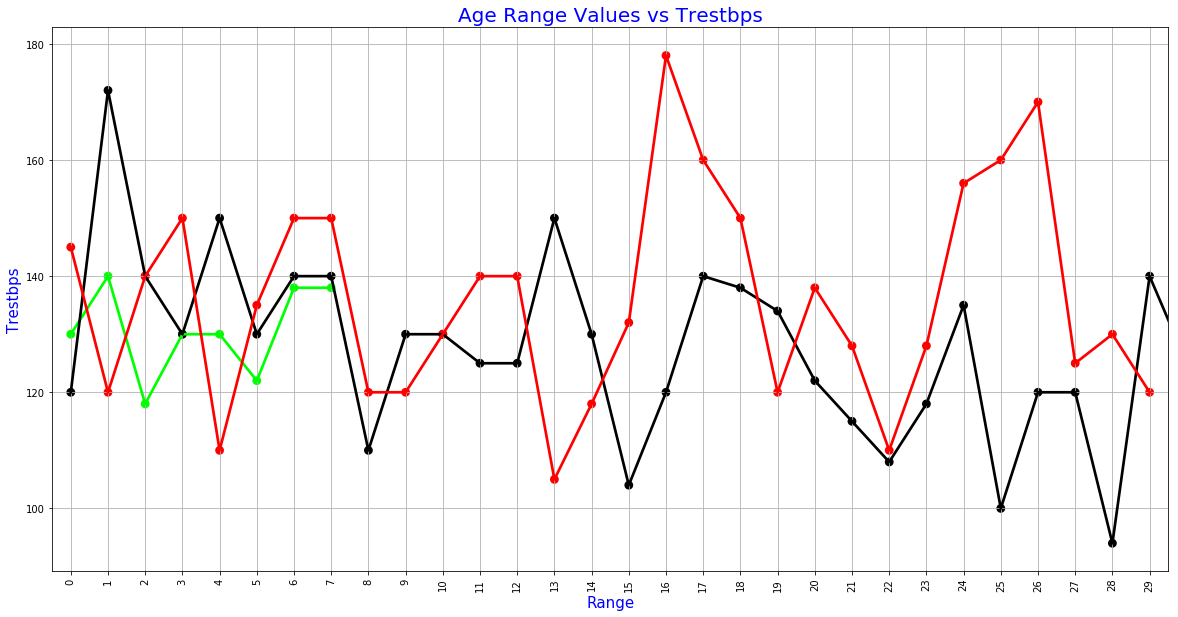

In [187]:
f,ax1=plt.subplots(figsize=(20,10))
sns.pointplot(x=np.arange(len(male_young_t_1)),y=male_young_t_1.Trestbps,color='lime',alpha=0.8,label='Young')
sns.pointplot(x=np.arange(len(male_middle_t_1)),y=male_middle_t_1.Trestbps,color='black',alpha=0.8,label='Middle')
sns.pointplot(x=np.arange(len(male_elderly_t_1)),y=male_elderly_t_1.Trestbps,color='red',alpha=0.8,label='Elderly')
plt.xlabel('Range',fontsize = 15,color='blue')
plt.xticks(rotation=90)
plt.legend(loc='upper right',frameon=True)
plt.ylabel('Trestbps',fontsize = 15,color='blue')
plt.title('Age Range Values vs Trestbps',fontsize = 20,color='blue')
plt.grid()
plt.show()

<p>It seems that old people have a very hard job because their values are very high.</p>